# FordGoBike Data Visualization
## by Yash Motwani


## Table Of Contents
- [Introduction](#intro)
- [Gathering the Data](#gather)
- [Assessing the Data](#assess)
- [Cleaning the Data](#clean)
- [Introduction to Dataset](#introdata)
- [Univariate Exploration](#uni)
- [Bivariate Exploration](#bi)
- [Multivariate Exploration](#multi)
- [Resources](#res)


<a id = 'intro'></a>
## Introduction

Bay Wheels(FordGoBike) is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Bay Wheels system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.  The system is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.

Bay Wheels is a public bicycle system, or bike-share scheme, in which bicycles are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" and return it at another dock belonging to the same system. Docks are special bike racks that lock the bike, and only release it by computer control. The user enters payment information, and the computer unlocks a bike. The user returns the bike by placing it in the dock, which locks it in place. Other systems are dockless. For many systems, smartphone mapping apps show nearby available bikes and open docks.

Here we wrangle and explore Baywheel's trip data which it makes available for public use. Baywheel's trip data is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from zipfile import ZipFile
import os
import requests
import glob

%matplotlib inline

<a id = 'gather'></a>
## GATHERING

### 1. Download zip files programatically

In [2]:
# Define the urls from where the data will be downloaded
urls = ['https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip', 
        'https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip']

In [3]:
# Make a directory
folder = 'bike_data'
if not os.path.exists(folder):
    os.makedirs(folder)

In [4]:
# Download each file from urls list one by one
for url in urls:
    response = requests.get(url)
    with open(os.path.join(folder, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

### 2. Extract Zip files to obtain .csv files

In [3]:
for zipdata in glob.glob('bike_data/*.zip'):
    with ZipFile(zipdata, 'r') as zip:
        zip.extractall()

### 3. Concat all .csv files to form one major dataset

In [9]:
files = glob.glob('*.csv')
frames = [pd.read_csv(datafile) for datafile in files]
ford_2018 = pd.concat(frames, ignore_index = True, sort = False)

In [13]:
ford_2018

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


### 4. Save ford_2018 master dataframe to a master csv file in the current directory
**Note - This step is done so that I don't have to repeat the above steps everytime I open the notebook because the codes in the above steps take time to process. You can skip this step if you do not want an extra file to occupy some space on your machine**

ford_2018.to_csv('master-dataset-ford-2018.csv', index=False)

### 5. Access the dataset normally
**Note - Now, I do not need to follow the above steps when I run the notebook next time. I can start working from this step directly**

In [2]:
ford_data = pd.read_csv('master-dataset-ford-2018.csv')

<a id = 'assess'></a>
## ASSESSING

Here I will assess the whole dataset and mention the Quality and Tidiness issues at the end in one cell because that cell has been updated along with the assessing process

In [17]:
# Visually assess the data
ford_data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


In [19]:
# Check the detailed info of the data
ford_data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null object
end_time                   1863721 non-null object
start_station_id           1851950 non-null float64
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1851950 non-null float64
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null int64
user_type                  1863721 non-null object
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null object
bike_share_for_all_trip    1863721 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [25]:
# Check the instances where start_station_id is null as indicated by above info
ford_data.query('start_station_id.isnull() == True')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
623364,5572,2018-06-30 20:58:31.8550,2018-06-30 22:31:24.5930,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4202,Customer,1989.0,Male,No
623376,573,2018-06-30 22:12:27.5110,2018-06-30 22:22:01.1740,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4095,Subscriber,1994.0,Male,Yes
623393,850,2018-06-30 22:01:25.5850,2018-06-30 22:15:36.1510,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4122,Customer,1990.0,Male,No
623429,562,2018-06-30 21:52:05.1180,2018-06-30 22:01:27.4400,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4184,Subscriber,1989.0,Male,No
623456,819,2018-06-30 21:37:34.5060,2018-06-30 21:51:13.7290,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4137,Customer,1985.0,Male,No
623472,1176,2018-06-30 21:23:30.4880,2018-06-30 21:43:07.3310,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.94,4152,Customer,1961.0,Male,No
623479,160,2018-06-30 21:37:50.9260,2018-06-30 21:40:30.9300,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4105,Subscriber,1990.0,Female,No
623548,7242,2018-06-30 19:19:19.5600,2018-06-30 21:20:02.1110,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4082,Customer,1990.0,Male,No
623549,725,2018-06-30 21:06:44.3580,2018-06-30 21:18:50.2180,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.96,4156,Customer,1983.0,Male,No
623550,694,2018-06-30 21:05:49.6180,2018-06-30 21:17:24.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.41,-121.94,4136,Customer,1987.0,Female,No


In [37]:
# Check the number of duplicates
sum(ford_data.duplicated())

0

In [44]:
# Check the number of unique bike ids
ford_data.bike_id.nunique()

5054

In [46]:
# Check the minimum bike id
ford_data.bike_id.unique().min()

11

In [3]:
# Check the descriptive statistics
ford_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


**Let's check for the outliers in member_birth_year through univariate exploration. Only this part is done here in order to do some basic assessment. Below, there will be a complete detailed section on this type of exploration.**

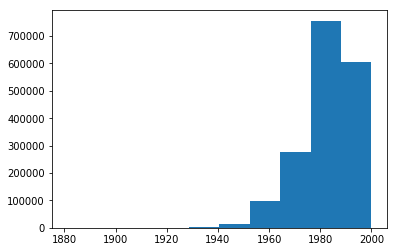

In [15]:
# Check the distribution of member_birth_year for outliers
plt.hist(ford_data.member_birth_year);

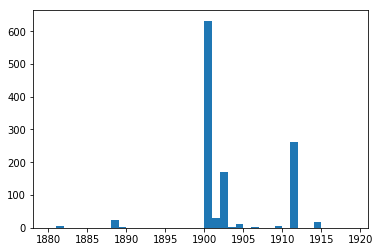

In [10]:
# Check the distribution of member_birth_year with axis limit for outliers
plt.hist(ford_data.member_birth_year, range(1880, 1920));

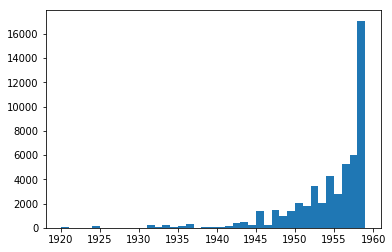

In [11]:
# Check the distribution of member_birth_year with axis limit for outliers
plt.hist(ford_data.member_birth_year, range(1920, 1960));

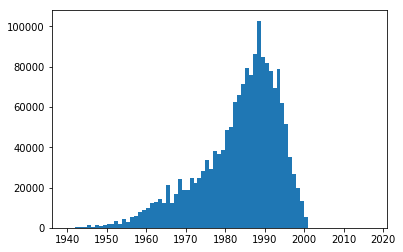

In [3]:
# Check the distribution of member_birth_year with axis limit to focus on main distribution
plt.hist(ford_data.member_birth_year, range(1940, 2018));

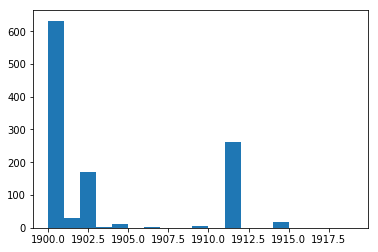

In [16]:
# Check the distribution of member_birth_year with axis limit to focus on main outliers
plt.hist(ford_data.member_birth_year, range(1900, 1920));

In [18]:
# Check for the instances where member birth year equals 1900 as suggested by above info
ford_data.query('member_birth_year == 1900')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
6196,1325,2018-01-30 16:48:10.1700,2018-01-30 17:10:15.5430,181.0,Grand Ave at Webster St,37.811377,-122.265192,189.0,Genoa St at 55th St,37.839649,-122.271756,2584,Customer,1900.0,Other,No
6738,497,2018-01-30 15:07:36.6890,2018-01-30 15:15:54.5280,175.0,49th St at Telegraph Ave,37.835946,-122.262366,191.0,Market St at 40th St,37.830545,-122.273937,3629,Subscriber,1900.0,Other,No
7224,3824,2018-01-30 11:13:56.4450,2018-01-30 12:17:40.6160,189.0,Genoa St at 55th St,37.839649,-122.271756,181.0,Grand Ave at Webster St,37.811377,-122.265192,1510,Customer,1900.0,Other,No
7461,2288,2018-01-30 10:06:01.2700,2018-01-30 10:44:09.7730,167.0,College Ave at Harwood Ave,37.848152,-122.252160,202.0,Washington St at 8th St,37.800754,-122.274894,3512,Customer,1900.0,Other,No
11178,300,2018-01-29 15:58:32.2050,2018-01-29 16:03:32.2440,167.0,College Ave at Harwood Ave,37.848152,-122.252160,206.0,College Ave at Bryant Ave,37.838127,-122.251271,1380,Customer,1900.0,Other,No
12111,258,2018-01-29 10:04:53.6480,2018-01-29 10:09:12.5160,206.0,College Ave at Bryant Ave,37.838127,-122.251271,167.0,College Ave at Harwood Ave,37.848152,-122.252160,1380,Customer,1900.0,Other,No
14862,687,2018-01-28 14:10:28.6190,2018-01-28 14:21:56.1640,109.0,17th St at Valencia St,37.763316,-122.421904,118.0,Eureka Valley Recreation Center,37.759177,-122.436943,2072,Subscriber,1900.0,Male,No
14980,1378,2018-01-28 13:24:44.0580,2018-01-28 13:47:42.1430,126.0,Esprit Park,37.761634,-122.390648,134.0,Valencia St at 24th St,37.752428,-122.420628,2882,Subscriber,1900.0,Male,No
15178,295,2018-01-28 12:49:05.1680,2018-01-28 12:54:00.9200,126.0,Esprit Park,37.761634,-122.390648,130.0,22nd St Caltrain Station,37.757369,-122.392057,2116,Subscriber,1900.0,Male,No
15211,1657,2018-01-28 12:18:47.7860,2018-01-28 12:46:25.7320,16.0,Steuart St at Market St,37.794130,-122.394430,126.0,Esprit Park,37.761634,-122.390648,2116,Subscriber,1900.0,Male,No


**Now, let's move ahead with our assessment**

In [39]:
# Check if the number of unique values of start_station_id and start_station_name match
ford_data.start_station_id.nunique(), ford_data.start_station_name.nunique()

(331, 348)

In [48]:
# Check how many station names are there for single station id as indicated by above info
pd.set_option('display.max_rows', 500)
ford_data.groupby(['start_station_id', 'start_station_name']).count()

,,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
start_station_id,start_station_name,,,,,,,,,,,,,,
3.0,Powell St BART Station (Market St at 4th St),31656,31656,31656,31656,31656,31656,31656,31656,31656,31656,31656,28784,28784,31656
4.0,Cyril Magnin St at Ellis St,6058,6058,6058,6058,6058,6058,6058,6058,6058,6058,6058,5144,5144,6058
5.0,Powell St BART Station (Market St at 5th St),25007,25007,25007,25007,25007,25007,25007,25007,25007,25007,25007,22846,22846,25007
6.0,The Embarcadero at Sansome St,33390,33390,33390,33390,33390,33390,33390,33390,33390,33390,33390,28379,28379,33390
7.0,Frank H Ogawa Plaza,8658,8658,8658,8658,8658,8658,8658,8658,8658,8658,8658,8240,8240,8658
8.0,The Embarcadero at Vallejo St,11322,11322,11322,11322,11322,11322,11322,11322,11322,11322,11322,9215,9215,11322
9.0,Broadway at Battery St,9989,9989,9989,9989,9989,9989,9989,9989,9989,9989,9989,9085,9085,9989
10.0,Washington St at Kearny St,7816,7816,7816,7816,7816,7816,7816,7816,7816,7816,7816,6745,6745,7816
11.0,Davis St at Jackson St,9731,9731,9731,9731,9731,9731,9731,9731,9731,9731,9731,9157,9157,9731


In [57]:
# Check for the value counts in gender
ford_data.member_gender.value_counts()

Male      1288085
Female     438188
Other       27081
Name: member_gender, dtype: int64

In [61]:
# Check for the value counts in user type
ford_data.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [62]:
# Check for the value counts in bike_share_for_all_trip
ford_data.bike_share_for_all_trip.value_counts()

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

Below I have collected all the Quality and Tidiness issues to be resolved.

### Quality Issues
1. Incorrect data types -

    a. `start_time` and `end_time` should be datetime series instead of objects

    b. `start_station_id` and `end_station_id` should be either integers or strings instead of floats

    c. `member_birth_year` should be integers instead of floats

    d. `member_gender`, `user_type` and `bike_share_for_all_trip`should be categorical instead of normal objects

2. `member_gender` and `member_birth_year` have high number of missing values


3. `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name` have simultaneously occuring missing values. These observations need further investigation to identify the reason of occurence of these missing values.


4. Oldest `member_birth_year` is 1881 which is an outlier. Birth years before 1940 are all outliers. This needs to be taken into consideration when formulating the new `age` column which will be required for further analysis.


5. Some station ids are for referring more than one station. Among these cases, some are same names written differently, others are temporary locations. 

<a id = 'clean'></a>
# CLEANING

### 1. Get a copy of the original dataset so that if anything needs to be reconsidered for cleaning, you should have your original dataset untouched with you.

In [3]:
ford_data_cl = ford_data.copy()

### 2. Start resolving the quality issues described above one by one

**1. Incorrect data types -**

**a. `start_time` and `end_time` should be datetime series instead of objects**

**Define:**  Convert `start_time` and `endtime` to datetime

**Code**

In [4]:
ford_data_cl.start_time = pd.to_datetime(ford_data_cl.start_time)
ford_data_cl.end_time = pd.to_datetime(ford_data_cl.end_time)

**b. `start_station_id` and `end_station_id` should be either integers or strings instead of floats**

**Define:** Convert `start_station_id` and `end_station_id` to string datatype

**Code**

In [5]:
# Convert the above mentioned variables to string datatypes
ford_data_cl.start_station_id = ford_data_cl.start_station_id.astype(str)
ford_data_cl.end_station_id = ford_data_cl.end_station_id.astype(str)

In [6]:
# Remove .0 at the end from both the variables converted above
ford_data_cl.start_station_id = ford_data_cl.start_station_id.apply(lambda x : x.split('.')[0])
ford_data_cl.end_station_id = ford_data_cl.end_station_id.apply(lambda x : x.split('.')[0])

c. `member_gender`, `user_type` and `bike_share_for_all_trip`should be categorical instead of normal objects

**Define:** Convert `member_gender`, `user_type` and `bike_share_for_all_trip` datatypes to categorical

**Code**

In [7]:
# Convert member_gender to ordered caegorical
ord_gender = ['Male', 'Female', 'Other']
cat_gender = pd.api.types.CategoricalDtype(ordered = True, categories = ord_gender)
ford_data_cl.member_gender = ford_data_cl.member_gender.astype(cat_gender)

In [8]:
# Convert user_type and bike_share_for_all_trip to categorical
ford_data_cl.user_type = ford_data_cl.user_type.astype('category')
ford_data_cl.bike_share_for_all_trip = ford_data_cl.bike_share_for_all_trip.astype('category')

**Test**

In [9]:
ford_data_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    category
dtypes: category(3), datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 190.2+ MB


In [10]:
ford_data_cl.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


2. Oldest `member_birth_year` is 1881 which is an outlier. Birth years before 1940 are all outliers. This needs to be taken into consideration when formulating the new `age` column which will be required for further analysis.

**Note : Here, we must include the null type data for `member_birth_year` or otherwise it will affect the distribution of other variables in the dataset. We can exclude null values while specifically analysing data using `member_birth_year`.**

**Define:** Remove the observations where `member_birth_year` is greater than 1940 including nulls

**Code**

In [9]:
ford_data_cl = ford_data_cl.query('member_birth_year >= 1940 | member_birth_year.isnull() == True')

**Note: Here, we are not changing the datatype of `member_birth_year` variable from float to int as it would require to remove null values. Although we can perform it using `astype(pd.Int64Dtype)` which is a nullable integer datatype but, since as I already experimented myself, and also as mentioned in the warning [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html) that this datatype is currently experimental and under development, we can't use it. The result of my experimentation was I was not able to plot any distribution graph for this variable using histogram and therefore I decided not to use it as it would have caused me further problems**

**Test**

In [18]:
ford_data_cl.member_birth_year.count()

1750502

In [19]:
ford_data_cl.query('member_birth_year >= 1940 | member_birth_year.isnull() == True').count()['member_birth_year']

1750502

In [21]:
ford_data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861220 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  category
member_birth_year          Int64
member_gender              category
bike_share_for_all_trip    category
dtypes: Int64(1), category(3), datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 205.9+ MB


**3. `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name` have simultaneously occuring missing values. These observations need further investigation to identify the reason of occurence of these missing values.**

**Explaination:**

They may occur because of the following reasons:
1. Its just a mere coincidence
2. Insufficient data from the software through which data is collected
3. Loss of information when tranfering/uploading to the website due to use of different encodings
4. **Start stations and end stations are same due to little or no difference between the latitude and longitude values of start and end stations respectively(may be some people have returned bike to the same station from where they boarded and software is not programmed to collect data for these variables in such cases.**

**4. Some station ids are for referring more than one station. Among these cases, some are same names written differently, others are temporary locations.**

**Explaination:**

These cases may have occured due to :

1. one-to-many mapping of station ids with GPS Locations(for eg. Google Maps give many names for one place)
2. shifting their stations from temporary location to a permanent one or 

### 3. Save ford_data_cl to a seperate csv file as we did in the end of the ***Gathering*** process

In [22]:
ford_data_cl.to_csv('master-dataset-ford-2018-clean.csv', index=False)

<a id = 'introdata'></a>
# INTRODUCTION TO DATASET

**Now, after the cleaning process, your dataset is ready for exploration and analysis**

In [20]:
ford_data_cl.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861220 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1861220 non-null int64
start_time                 1861220 non-null datetime64[ns]
end_time                   1861220 non-null datetime64[ns]
start_station_id           1861220 non-null object
start_station_name         1849449 non-null object
start_station_latitude     1861220 non-null float64
start_station_longitude    1861220 non-null float64
end_station_id             1861220 non-null object
end_station_name           1849449 non-null object
end_station_latitude       1861220 non-null float64
end_station_longitude      1861220 non-null float64
bike_id                    1861220 non-null int64
user_type                  1861220 non-null category
member_birth_year          1750502 non-null float64
member_gender              1750853 non-null category
bike_share_for_all_trip    1861220 non-null category
dtypes: category(3), datetime64[ns](2), float6

### What is the structure of your dataset?
In the dataset, there are total 16 columns for referring to 16 different variables and 1,861,220 rows referring to observations. Following are the further details about variables: 
1. 3 columns referring to 3 categorical variables.

    a. `member_gender` - with 3 categories - Male, Female, Other
    
    b. `bike_share_for_all_trip` - with 2 categories referring to member's interest - yes, no
    
    c. `user_type` - with 2 categories - customer, subscriber
    
    
2. 10 columns referring to postion, name, id, date and time of the starting and ending stations


3. 1 column for bike information(`bike_id`), 1 column for `member_birth_year` and 1 column for trip duration(`duration_sec`)

### What is/are the main feature(s) of interest in your dataset?
I am more intersting in exploring and understanding information about the members in relation to their usage of the bikes. Therefore the following will be my areas of interest :
1. What are the times people are likely to rent a bike. This could include exploring the relation with time in different ways. For example: time in the form of hours, days, months, weekdays, etc can be explored. 


2. For what duration, people are likely to rent a bike? Does this affect the distance that they travelled? 


3. User type, gender, `bike_share_for_all_trip` and age (will be extracted through birth year) are the variables which defines the user personal data. Therefore, I would like to explore the above mentioned areas of interest in terms of user's personal data.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Although features like age-group, gender, user type and bike type may support my investigation in my areas of interest but I think age-group will have strongest effect on peoples' usage

<a id = 'uni'></a>
# Univariate Exploration

**Here, I will investigate variables according to order of my areas of interest. This is the same order as I have listed above**

I will start investigating distribution of time variables. Before that I need to set new columns for month, weekday and hour with the use of start_time column

In [10]:
ford_data_cl['week_day'] = ford_data_cl.start_time.dt.weekday_name
ford_data_cl['month'] = ford_data_cl.start_time.dt.strftime("%b")
ford_data_cl['hour'] = ford_data_cl.start_time.dt.hour

In [11]:
ford_data_cl.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,week_day,month,hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,Wednesday,Jan,22
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,Wednesday,Jan,16
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,Wednesday,Jan,14
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,Wednesday,Jan,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,Wednesday,Jan,19


**Now, we are ready to explore time variables**

We need to convert `week_day` column into ordered categorical so that we don't have to order the weekdays everytime we use the variable in the graphs

In [12]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_ord = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
ford_data_cl.week_day = ford_data_cl.week_day.astype(week_ord)
ford_data_cl.week_day.value_counts()

Tuesday      318828
Wednesday    315968
Thursday     313666
Monday       294276
Friday       289981
Saturday     175360
Sunday       153141
Name: week_day, dtype: int64

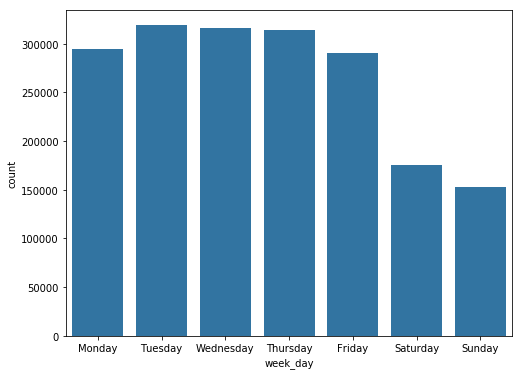

In [22]:
# Set the figure size
plt.figure(figsize = (8,6))

# Set the base color
base_color = sb.color_palette()[0]

# Plot the countplot for weekday
sb.countplot(data = ford_data_cl, x = 'week_day', color = base_color)

**Here, we can clearly see that people have mostly rented bikes on Tuesdays and least rented on Sundays. It may be due to the fact that working class people are more busy on weekdays and are more likely to take rest on weekends**

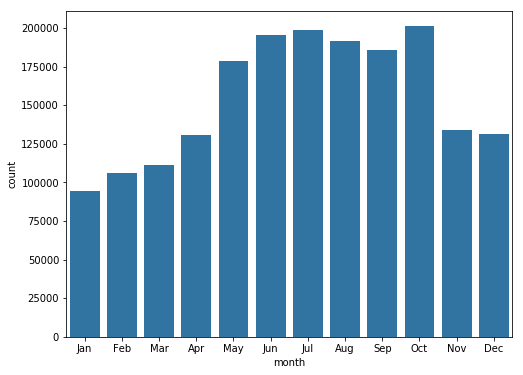

In [24]:
# Set the figure size
plt.figure(figsize = (8,6))

# Set the base color
base_color = sb.color_palette()[0]

# Plot the countplot for month
sb.countplot(data = ford_data_cl, x = 'month', color = base_color)

**It can be clearly seen that that more bikes got rented from May till October in comparison to rest of the months with most number of rents in October and least in January**

In [26]:
# Check the value counts for the hour variable
ford_data_cl.hour.value_counts()

17    219817
8     206560
18    171076
9     160720
16    142876
19    103753
7     101712
15     96601
12     89961
13     87597
10     84093
14     83050
11     79338
20     66474
21     46900
6      36338
22     31028
23     18633
0      10230
5      10024
1       5884
2       3696
4       2739
3       2120
Name: hour, dtype: int64

**Here we can clearly see the distribution of the `hour` values for the whole year. The counts are displayed from high to low clearly indicating that 5 p.m. has been the most busy hour when 219,817 bikes got rented and 3 has been the least busy when only 2120 bikes got rented. Let's check the same through the countplot**

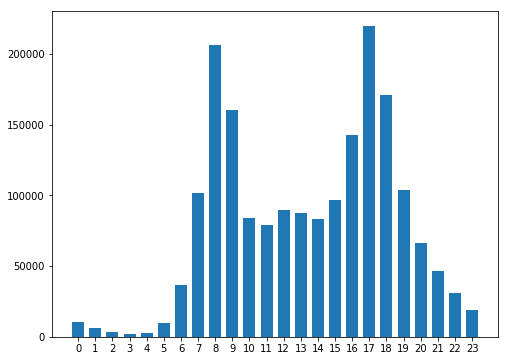

In [35]:
plt.figure(figsize = (8,6))

# Set the range and the bin size
bin_edges = np.arange(-0.5, 23.5+1, 1)

plt.hist(ford_data_cl.hour, bins = bin_edges, rwidth = 0.7);

# Set the xticks
locations = np.arange(0, 24, 1 )
plt.xticks(locations, locations.astype(str));

**It can be seen here that peak hours of bike rentals are 8 and 17 and by this we can say that it may be due to office timings of the working class. People are more likely to go to work at 8 a.m. and return at 5 p.m.** 

**Now, its time to investigate `duration_sec` variable for investigating duration for the bike rents**

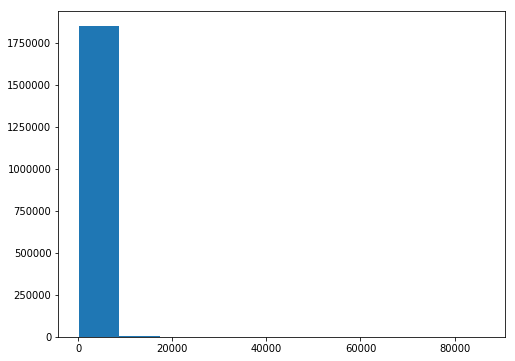

In [36]:
plt.figure(figsize = (8,6))
bin_edges = np.arange(-0.5, 23.5+1, 1)
plt.hist(data = ford_data_cl, x = 'duration_sec');


**This suggests presence of outliers that we were not able to observe at the time of assessing. We need to set the axis limits**

In [37]:
# Check the descriptive statistics of the duration_sec
ford_data_cl.duration_sec.describe()

count    1.861220e+06
mean     8.574284e+02
std      2.371140e+03
min      6.100000e+01
25%      3.500000e+02
50%      5.560000e+02
75%      8.720000e+02
max      8.636600e+04
Name: duration_sec, dtype: float64

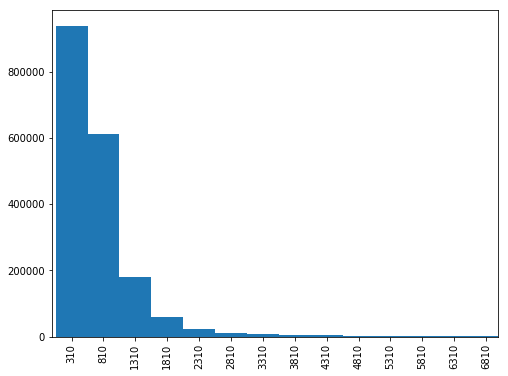

In [24]:
plt.figure(figsize = (8,6))
bin_edges = np.arange(60, ford_data_cl.duration_sec.max()+500, 500)
plt.hist(data = ford_data_cl, x = 'duration_sec', bins = bin_edges);
locations = np.arange(60+250, ford_data_cl.duration_sec.max()+250, 500)
plt.xticks(locations, locations.astype(str), rotation = 90)

# Set the limit on the x axis
plt.xlim(0, 7000);

**We can see that this is a highly right skewed positively. We may explore this distribution using the log_scale**

In [25]:
# Check the descriptive stats of duration_sec in log form
np.log10(ford_data_cl.duration_sec).describe()

count    1.861220e+06
mean     2.752580e+00
std      3.279495e-01
min      1.785330e+00
25%      2.544068e+00
50%      2.745075e+00
75%      2.940516e+00
max      4.936343e+00
Name: duration_sec, dtype: float64

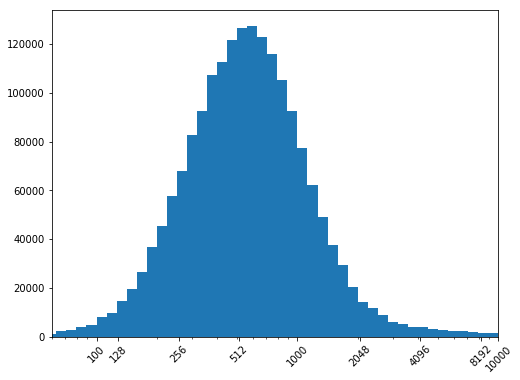

In [48]:
plt.figure(figsize = (8,6))

# Change the binsize and range to match log scale without affecting the values
bin_edges = 10**np.arange(1.7, np.log(ford_data.duration_sec).max()+0.05, 0.05)
plt.hist(data = ford_data_cl, x = 'duration_sec', bins = bin_edges)

# Set the x scale to the log base 10
plt.xscale('log')

plt.xlim(60, 10000)
locations = [100, 2**7, 2**8, 2**9, 1000, 2**11, 2**12, 2**13, 10000]
plt.xticks(locations, locations, rotation = 45);

**We can clearly depict that this is a unimodal distribution with maximum counts for duration between 512 and 1000 seconds. This also suggests further exploration of relation of outliers with old age groups or with Nan values in birth year and gender columns**

**Note: We are not investigating the distance factor here because to calculate distance just based on the information of latitudes and longitudes would be wrong. The person may have visited different places before going to the end station or the person may have returned the bike to the starting station. Therefore including this variable could mislead our investigation**

**Now, we need to explore age variable. For that we need to add an age column. Calculate the age of the members w.r.t. 2018**

In [14]:
# Calculate the member age
ford_data_cl['member_age'] = 2018 - ford_data_cl.member_birth_year

In [28]:
# Check if the above method worked properly
ford_data_cl.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861220 entries, 0 to 1863720
Data columns (total 20 columns):
duration_sec               1861220 non-null int64
start_time                 1861220 non-null datetime64[ns]
end_time                   1861220 non-null datetime64[ns]
start_station_id           1861220 non-null object
start_station_name         1849449 non-null object
start_station_latitude     1861220 non-null float64
start_station_longitude    1861220 non-null float64
end_station_id             1861220 non-null object
end_station_name           1849449 non-null object
end_station_latitude       1861220 non-null float64
end_station_longitude      1861220 non-null float64
bike_id                    1861220 non-null int64
user_type                  1861220 non-null category
member_birth_year          1750502 non-null float64
member_gender              1750853 non-null category
bike_share_for_all_trip    1861220 non-null category
week_day                   1861220 non-null ca

C:\Users\yashm\Anaconda3\envs\jupy_proj_1\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\yashm\Anaconda3\envs\jupy_proj_1\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


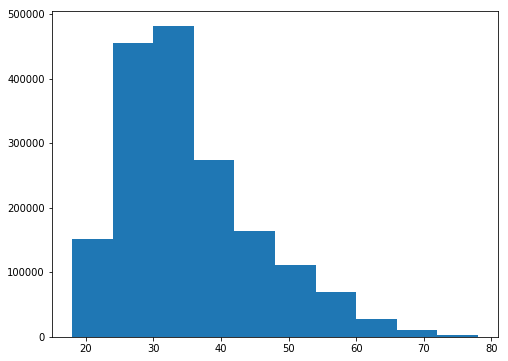

In [29]:
# PLot the distribution of age values
plt.figure(figsize = (8,6))
plt.hist(data = ford_data_cl, x = 'member_age');

**This is a right skewed graph, but we can definitely improve this**

In [30]:
# Check the descriptive stats of member_age
ford_data_cl.member_age.describe()

count    1.750502e+06
mean     3.481968e+01
std      1.014342e+01
min      1.800000e+01
25%      2.700000e+01
50%      3.300000e+01
75%      4.000000e+01
max      7.800000e+01
Name: member_age, dtype: float64

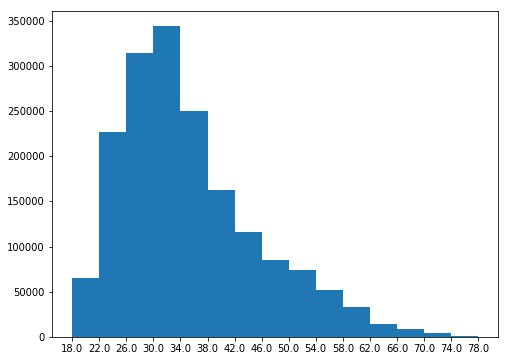

In [14]:
# Plot the distribution of age values with suitable bin size
plt.figure(figsize = (8,6))
bin_edges = np.arange(18, ford_data_cl.member_age.max()+4, 4)
plt.hist(data = ford_data_cl, x = 'member_age', bins = bin_edges);
plt.xticks(bin_edges, bin_edges.astype(str));

**The graph is a right skewed unimodal distribution of ages which clearly shows that people with ages between 30 and 34 rented most bikes while people in the older age groups between 74 and 78 rented least bikes. This also gives us an idea to divide people according to their age groups. So, let us do that first and check the distribution**

In [15]:
# Create a function to divide ages among 3 age groups
def age_groups(x):
    if x >= 18 and x <= 28:
        return 'youth'
    if x >= 29 and x <= 64:
        return 'adults'
    if x >= 65:
        return 'seniors'
    else:
        return x

In [16]:
# Apply the above function to member_age
ford_data_cl['age_group'] = ford_data_cl.member_age.apply(lambda x: age_groups(x))

In [133]:
# Check if the above method is applied correctly
ford_data_cl.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861220 entries, 0 to 1863720
Data columns (total 21 columns):
duration_sec               1861220 non-null int64
start_time                 1861220 non-null datetime64[ns]
end_time                   1861220 non-null datetime64[ns]
start_station_id           1861220 non-null object
start_station_name         1849449 non-null object
start_station_latitude     1861220 non-null float64
start_station_longitude    1861220 non-null float64
end_station_id             1861220 non-null object
end_station_name           1849449 non-null object
end_station_latitude       1861220 non-null float64
end_station_longitude      1861220 non-null float64
bike_id                    1861220 non-null int64
user_type                  1861220 non-null category
member_birth_year          1750502 non-null float64
member_gender              1750853 non-null category
bike_share_for_all_trip    1861220 non-null category
week_day                   1861220 non-null ca

**Now, we need to categorize our age group variable**

In [17]:
# Convert age_group to ordered categorical
age_gr = ['youth','adults','seniors']
age_ord = pd.api.types.CategoricalDtype(ordered = True, categories = age_gr)
ford_data_cl.age_group = ford_data_cl.age_group.astype(age_ord)

In [18]:
# Check if the above method is applied correctly
ford_data_cl.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
week_day                         category
month                              object
hour                                int64
member_age                        float64
age_group                        category
dtype: object

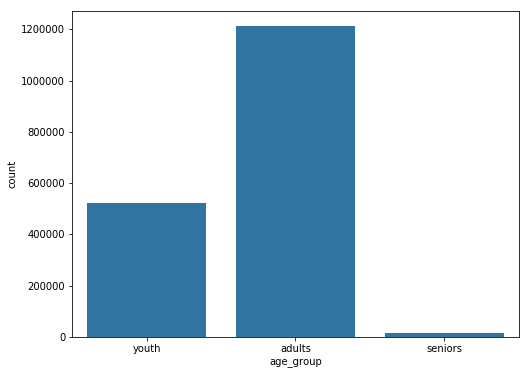

In [44]:
# Plot the distribution of age groups
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]
sb.countplot(data = ford_data_cl, x = 'age_group', color = base_color)

**As it can be seen that most number of times bike have been rented by adults, followed by youth and at the last the seniors. This may be due to the less activity of the seniors and the fact that the working class mostly includes adults**

**I will now move on to exploring individual distributions for other categorical variables left. Let's plot them all at once**

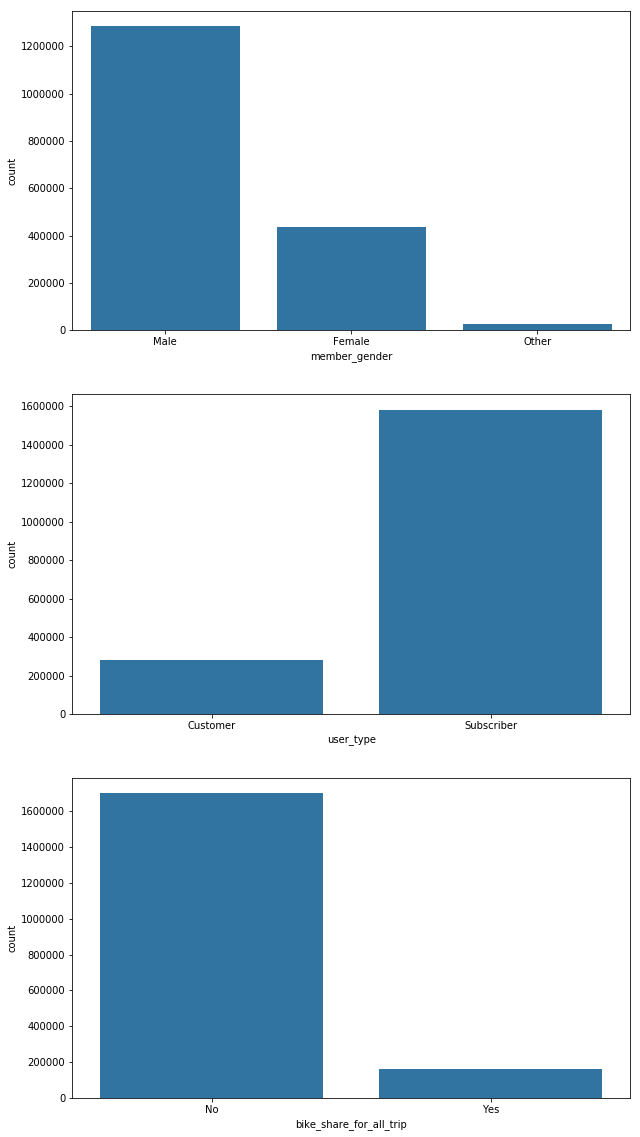

In [33]:
base_color = sb.color_palette()[0]
yticks = np.linspace(0, 1200000, 100000)

# Create a subplot to plot the distributions of member_gender, user_type and bike_share_for_all_trip altogether
fig, axis = plt.subplots(nrows = 3, figsize = [10,20])
sb.countplot(data = ford_data_cl, x = 'member_gender', color = base_color, ax = axis[0]);
sb.countplot(data = ford_data_cl, x = 'user_type', color = base_color, ax = axis[1]);
sb.countplot(data = ford_data_cl, x = 'bike_share_for_all_trip', color = base_color, ax = axis[2]);


**We can clearly see here the vast differences in counts of divisions under each categorical variable. With respect to genders, males have rented the bikes most of the times followed by females and other genders. Also, there are more subscribers than customers may be due to having additional benefits of being a subscriber. In the end graph, there are very less people who use bikes for all the trips in comparison to people who do not use it always. Maybe people in the young age groups would have preferred the bikes always.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **When I explored `duration_sec`, it was distributed over a wide range with extreme outliers. Even after setting the axis limits, I saw that this was a highly right skewed positive graph. So, I decided to use the log_scale tranformation. After that it was clearly depicted that this was a unimodal distribution with maximum counts for duration between 512 and 1000. This also suggested further exploration of relation of outliers with old age groups or with Nan values in birth year and gender columns**


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> **During _Assessing_ part, when I explored `member_birth_year` variable, i figured out that oldest member_birth_year is 1881 which is an outlier. Birth years before 1940 are all outliers for age to be valid, uniformly distributed and acceptable. So, removed the users with birth years before 1940**

> **As I mentioned in the above question about presence of extreme outliers in the `duration_sec variable`. So, I changed the x axis limit from 60 to 10000 seconds.**

<a id = 'bi'></a>
## Bivariate Exploration

>**Following the Univariate Exploration under areas of interest, now its time to explore Bivariate relationships. As we now know that we do not have much numeric variables for initial exploration in the form of pair grids or heat maps to depict correlation coefficients in correlation matrix. We already know our variables and have already evolved them in the suitable form. Therefore, initial exploration with these variables will not make much sense here. We can start exploring in our areas of interest**

**So, let's start exploring `duration_sec` with time variables. So, first we will explore relationship between duration and week days through violinplot and pointpot**

**Because of the outliers, it is necessary to set the duration limits under 98% confidence interval. Therefore, limits for the duration_sec variable is calculated below:**

In [59]:
np.percentile(ford_data_cl.duration_sec, 1), np.percentile(ford_data_cl.duration_sec, 99)

(106.0, 5536.810000000056)

In [19]:
# Create a subset with necessary variables and duration limits
time_data = ford_data_cl[['week_day', 'hour', 'month', 'duration_sec']].query('duration_sec >= 106 & duration_sec <= 5537')

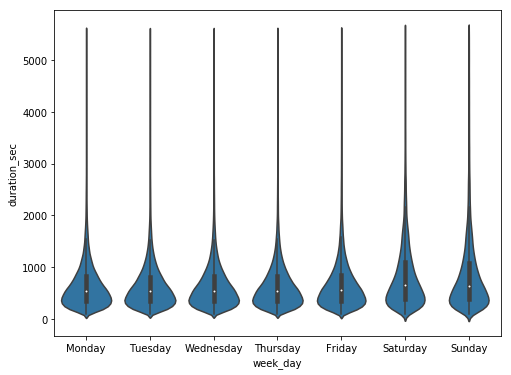

In [19]:
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]

# Plot the violinplot for duration_sec vs week_day
sb.violinplot(data = time_data, x = 'week_day', y = 'duration_sec', color = base_color)

**So, here, high variance is observed on all weekdays with right skewed distribution of duration. As we see more closer, we find that density is thick on weekdays than weekends but at almost same duration level on all weekdays which suggests high number of bikes being rented for that duration.**

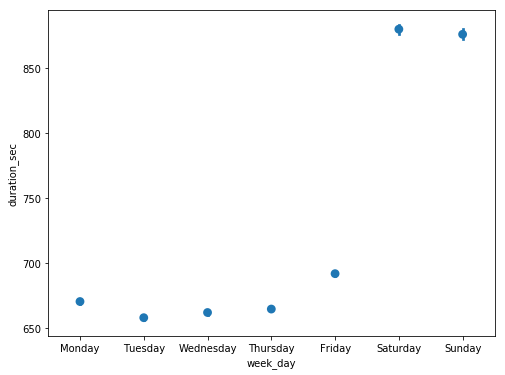

In [64]:
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]

# Plot the pointplot for duration_sec vs weekday
sb.pointplot(data = time_data, x = 'week_day', y = 'duration_sec', color = base_color, linestyles = '')

**This shows an interesting observation in addition to the above plot. Although most bikes may have been rented on weekdays for same duration but people have liked to rent bikes on weekends for a longer duration**

**Next, we will explore relationship between duration and months through violinplot and pointplot**

(0, 1000)

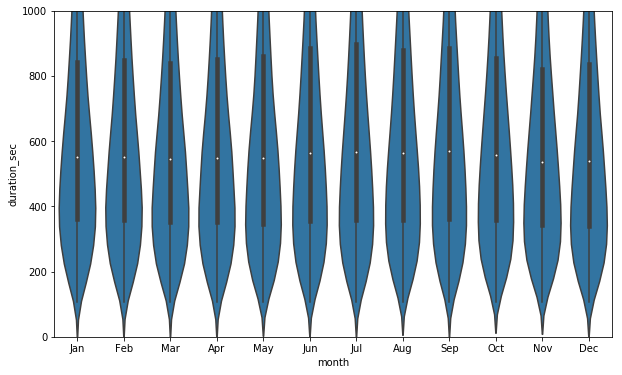

In [68]:
# Plot the violinplot
plt.figure(figsize = (10,6))
base_color = sb.color_palette()[0]
sb.violinplot(data = time_data, x = 'month', y = 'duration_sec', color = base_color, aspect = 1.5)
plt.ylim(0, 1000)

**The right skewed distributions, as we can see here, is almost the same every month. Even the medians are at the same level of duration, a little below 600 seconds. This suggests most bikes are rented for almost same duration level in all the months**

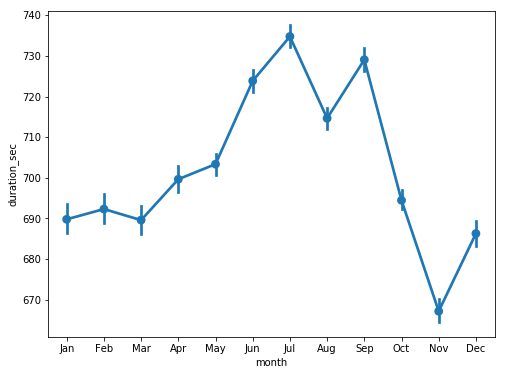

In [75]:
# Plot the pointplot
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]
sb.pointplot(data = time_data, x = 'month', y = 'duration_sec', color = base_color, linestyles = '-')

**Now, this is interesting. As shown here, average duration in July is the highest and november is the lowest. This suggests, people have liked to go out on bikes for longer duration in summers than months of winter as we can see here, average duration starts increasing from April till July, then there is a sight drop in August. But after september, there is a major drop in octoberwhen winter starts again.**

**Now, finally explore relationship between duration and hours through violinplot**

(0, 1000)

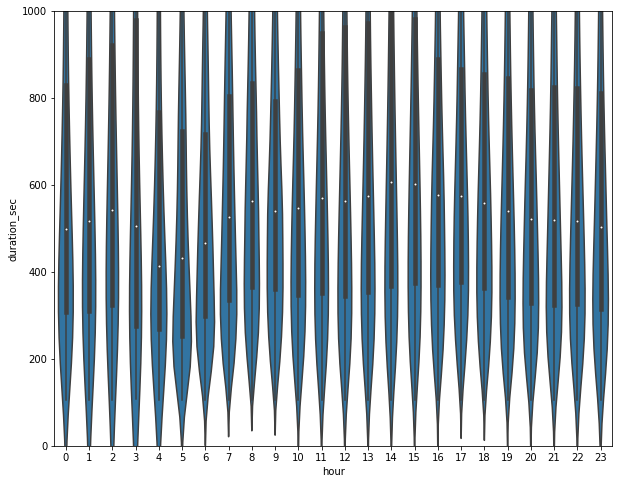

In [77]:
plt.figure(figsize = (10, 8))
base_color = sb.color_palette()[0]
sb.violinplot(data = time_data, x = 'hour', y = 'duration_sec', color = base_color)
plt.ylim(0, 1000)

**There is an interesting pattern to note here. Firstly, all hours are positively skewed. Secondly, according to the peak densities, less number of bikes have been rented during 1-3 a.m. and 11a.m. - 3p.m.during the day with most number of bikes being rented at 5 a.m. Most number of bikes around 4 a.m. were rented for low duration of around 400seconds while most number of bikes around 2 p.m. were rented for high duration of around 600 seconds.** 

**Now, let's explore the relation of duration with variables that define user's personal information. Let's start with duration versus age group. Here, we will explore the relationship of outliers too**

In [20]:
# Create two seperate subsets, lim_df for main duration_sec values, out_df for outliers in duration_sec
lim_df = ford_data_cl[['age_group', 'member_gender', 'user_type', 'duration_sec']].query('duration_sec >= 0 & duration_sec <= 5537')
out_df = ford_data_cl[['age_group', 'member_gender', 'user_type', 'duration_sec']].query('duration_sec > 5537')

In [21]:
# Create a histogram plot function for main duration_sec values
def myhist(x, **kwargs):
    bin_edges = 10**np.arange(1.7, np.log(lim_df.duration_sec.max())+0.05, 0.05)
    locations = [60, 2**7, 2**8, 2**9, 1000, 2**11, 2**12, 5537]
    plt.hist(x,  bins = bin_edges)
    plt.xscale('log')
    plt.xlim(60, 5537)
    plt.xticks(locations, locations, rotation=45)

C:\Users\yashm\Anaconda3\envs\jupy_proj_1\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


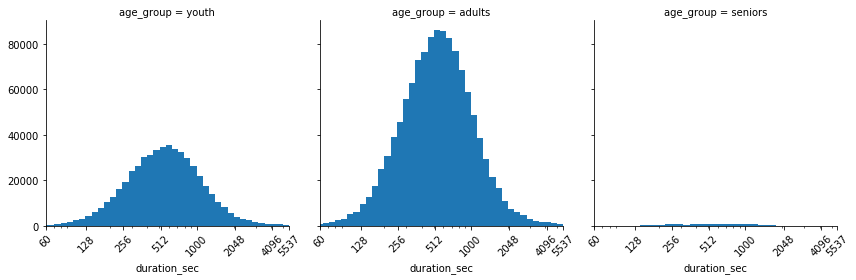

In [119]:
# Plot the graphs under FacetGrid using above defined histogram function
g = sb.FacetGrid(data = lim_df, col = 'age_group', size = 4)
g = g.map(myhist, 'duration_sec')


**Here we are comparing the distributions of duration in each category of age groups. As it is evident that, both youth and adults have mostly rented the bikes for duration around 512 seconds with number of times to rent in adults group is above 80,000 and and in youth group is a bit below 40,000. Seniors have very less count of bike rents for any duration that it can't be compared to any of the former groups.**

In [23]:
# Create a histogram plot function for outlier values of duration_sec
def myhist_out(x, **kwargs):
    bin_edges = np.arange(5538, out_df.duration_sec.max()+1000, 1000)
    plt.hist(x,  bins = bin_edges)
    plt.xlim(5538, out_df.duration_sec.max())
    # set the rotation of xticks for clear visibility
    plt.xticks(rotation=45)

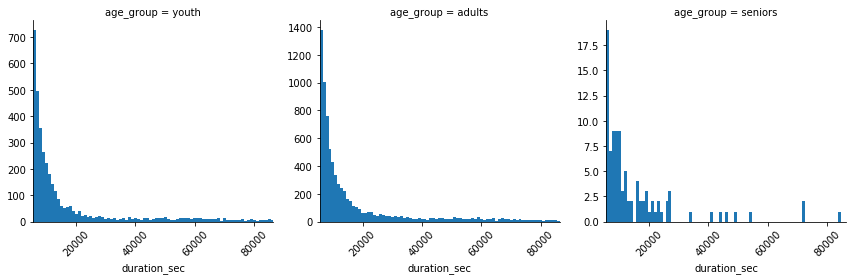

In [152]:
# Plot the graphs under FacetGrid using above defined histogram function
g = sb.FacetGrid(data = out_df, col = 'age_group', height = 4, sharey = False)
g = g.map(myhist_out, 'duration_sec')

**So, here we can see that most number of outliers lie in adults group followed by youth and few in seniors group**

**Now, similarly I will do for user types**

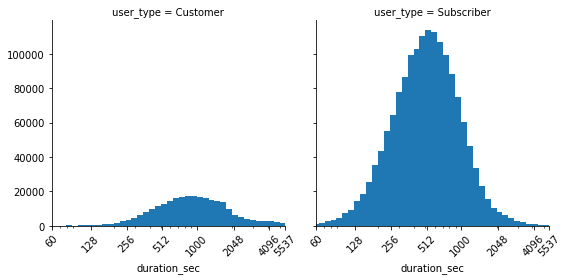

In [153]:
# Plot the graphs under FacetGrid using myhist function
g = sb.FacetGrid(data = lim_df, col = 'user_type', height = 4)
g = g.map(myhist, 'duration_sec')

**It is clearly shown that Subscribers have rented a lot more bikes than Customers. Peak for the number of times for bike rentals is above 1,00,000 for subscribers with duration of around 512 seconds while it is under 20,000 for Customers with duration around 1,000 seconds**

**Subscribers and Adults group look very much similar in terms of distribution**

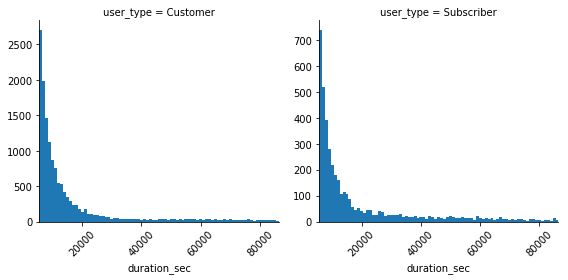

In [154]:
# Plot the graphs under FacetGrid using myhist_out function
g = sb.FacetGrid(data = out_df, col = 'user_type', height = 4, sharey = False)
g = g.map(myhist_out, 'duration_sec')

**Here, it is the opposite case. There seem to have more outliers in the customers group**

**Similarly, let's explore the relationship between duration and gender**

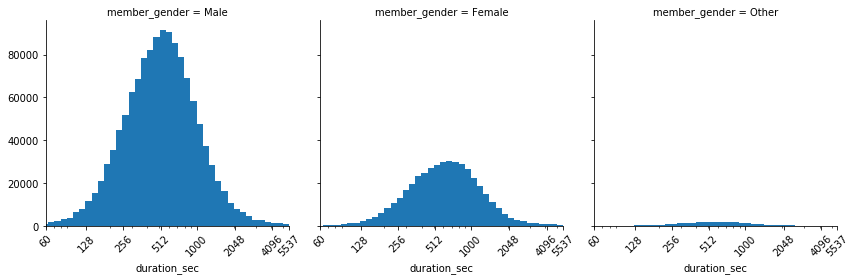

In [155]:
# Plot the graphs under FacetGrid using myhist histogram function
g = sb.FacetGrid(data = lim_df, col = 'member_gender', height = 4)
g = g.map(myhist, 'duration_sec')

These plots look much similar to the ones we saw for `age_group` vs `duration_sec`. I would like to point out the similarities:
1. The distribution of `duration_sec` for **males** is very much similar to distribution of `duration_sec` for **adults** age group with similar duration specifications.
2. The distribution of `duration_sec` for **females** is very much similar to distribution of `duration_sec` for **youth** age group with similar duration specifications.
3. The distribution of `duration_sec` for **Others** is very much similar to distribution of `duration_sec` for **seniors** age group with similar duration specifications.

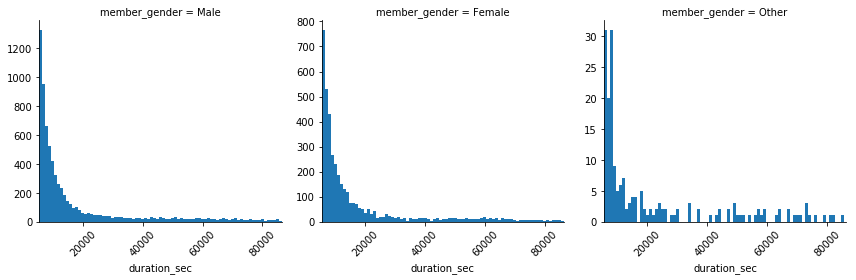

In [157]:
# Plot the graphs under FacetGrid using myhist_out function
g = sb.FacetGrid(data = out_df, col = 'member_gender', height = 4, sharey = False)
g = g.map(myhist_out, 'duration_sec')

**These plots for outliers also look much similar to the ones we saw for `age_group` vs `duration_sec` with same similarities as pointed above**

**Now, going towards the end, we should finally explore time variables with user's personal information. For that we need to define a function to reduce the pain of typing the same length of codes again and again.**

In [24]:
# Define a countplot function
def cat_count(c, z, axd):
    sb.countplot(data = ford_data_cl, x = c, hue = z, ax = axd)
    # Set the current axis
    plt.sca(axd)
    plt.xticks(rotation = 45)

**Now we are ready to explore the relationships between our time variables (weekday, month and hour) with variables for identifying user information(age group, user type and gender). Let's start exploring relationship of weekdays with user information variables**

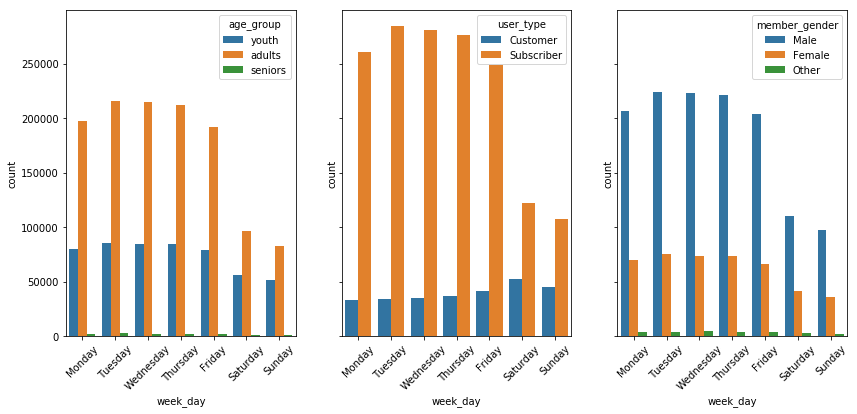

In [45]:
# Plot the subplots and collect their outputs as figure and axis 
figure, axis = plt.subplots(ncols = 3, sharey = True, figsize = (14, 6))

# Plot the relationships using axis variable and cat_count function in the subplots 
cat_count('week_day', 'age_group', axis[0])
cat_count('week_day', 'user_type', axis[1])
cat_count('week_day', 'member_gender', axis[2])

**Here, moving from left plots towards right, it's clearly depictable that :**
1. **On Tuesdays adults have been renting more bikes and on sundays the least. Same is the case with young people. We can't say anything clearly about seniors as the counts are too low to be able to depict anything.**
2. **On Tuesdays subscribers have been renting more bikes and on sundays the least while in case of customers, they have been renting more bikes on saturdays and least on mondays. Also, the the number of rented bikes on any given day is too high for subscribers than customers except weekends.**
3. **The gender categories follow a similar trend as age groups with males following adults, females following the youth and others following the seniors**

**Now, we will explore relationship of months with user information variables**

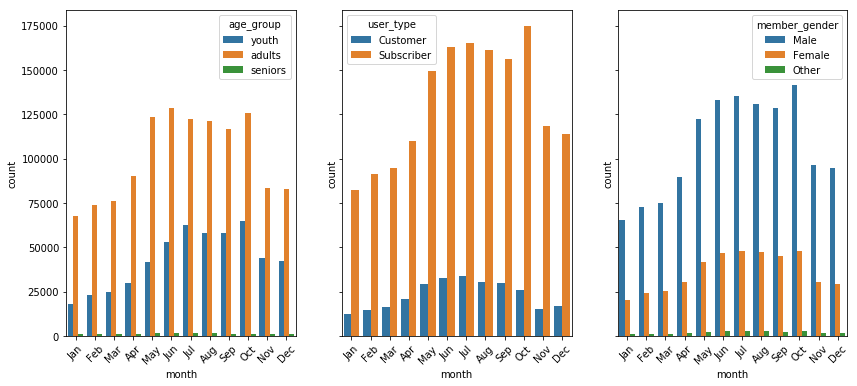

In [46]:
figure, axis = plt.subplots(ncols = 3, sharey = True, figsize = (14, 6))

cat_count('month', 'age_group', axis[0])
cat_count('month', 'user_type', axis[1])
cat_count('month', 'member_gender', axis[2])

**Here, moving from left plots towards right, it can be clearly seen that :**

**1. In June, adults have rented most bikes and in January, the least. While youths have rented most bikes in October and again in January, they have also rented least bikes. We can't say anything clearly about seniors as the counts are too low to be able to depict anything.**

**2. Here subscribers are showing similar trend to youth but the number of rents are too high even in comparison to customers. Customers have rented most bikes in July and least in January.**

**3. The gender categories follow asomewhat similar to both age groups and user types with males following subscribers with a little less number of rented bikes, females following the youth others following the seniors.**

**4. In general, adults, subscribers and males have rented bikes mostly.**

**Now, we will explore relationship of hours with user information variables**

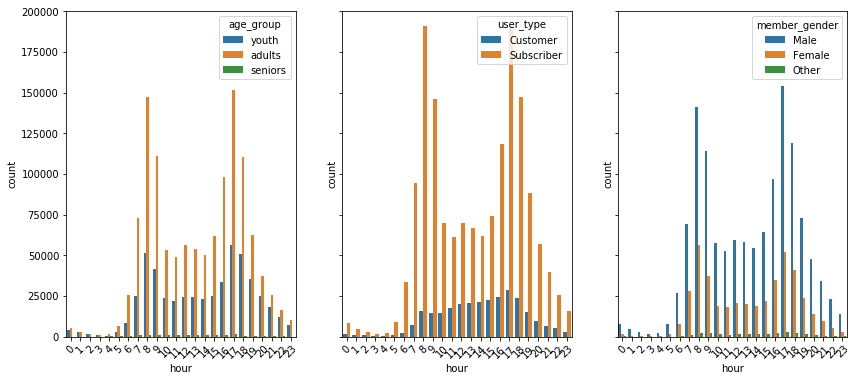

In [47]:
figure, axis = plt.subplots(ncols = 3, sharey = True, figsize = (14, 6))

cat_count('hour', 'age_group', axis[0])
cat_count('hour', 'user_type', axis[1])
cat_count('hour', 'member_gender', axis[2])

**Here, moving from left plots towards right, we can say that :**

**1. 8a.m. and 5 p.m. have been the most busy hours for adults to rent the bikes and 3 a.m. and 4 a.m., the least. Youths have also rented most and least bikes during the same hours as adults . We can't say anything clearly about seniors as the counts are too low to be able to depict anything.**

**2. Here subscribers are showing similar trend to adults but the number of rents are too high even in comparison to customers. Customers have rented most bikes 5 p.m and least during 3 a.m. and 4 a.m.**

**3. The gender categories follow a somewhat similar to age groups with males following adults, females following the youth others following the seniors.**

**4. In general, adults, subscribers and males have rented bikes mostly.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- When we related duration with weekdays, we saw that people are likely to go for long rides on weekends although most bikes get rented on weekdays.

- When we related duration with months, we saw that people have liked to go out on long rides and enjoy in summers from April till July. But after september, whenwinter starts people again start taking shorter rides.

- When we related duration with hours, we saw that there was an interesting pattern. During the early morning hours form 1a.m. to 4 a.m., people have less liked to rent bikes and also the ones who rented were also for short duration. While most number of bikes around 2 p.m. were rented for high duration of around 600 seconds.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

So, when we were exploring user information variables with other variables, we saw they relate to one another in an interesting way.
- Males are very much likely to follow adults group in terms of for what duration the bikes have been rented. And similarly, females are very much likely to follow the youth and others are likely to follow seniors.
- Similar trend as above was observed in terms how many bikes have been rented in a weekday or in terms of how many bikes have been rented in an hour

<a id = 'multi'></a>
## Multivariate Exploration

From the above Bivariate plots, I found some relationships of interest to explore even further with some variables of interest

**So, in the previous section, in the beginning, we found some interesting relationships in duration vs weekdays pointplots and duration vs month pointplots. So, lets explore these point plots further with variables that identify user information, age group and gender specifically, as both these variables had shown similar trends when we related them with duration and other time variables hour, weekday and month. So let's start with `week_day` vs `duration_sec` pointplot from the previous section and explore it further with genders and age groups.**

In [26]:
# Create a subset with necessary vaiables and duration_sec under limits
cat_time_data = ford_data_cl[['week_day', 'hour', 'month', 'age_group', 'member_gender', 'duration_sec']].query('duration_sec >= 106 & duration_sec <= 5537')

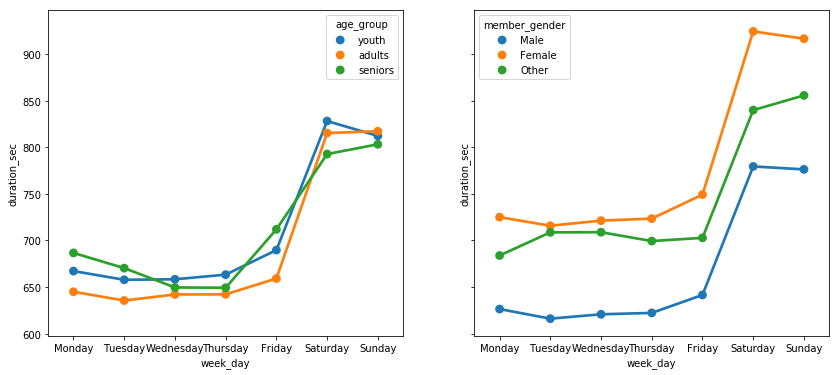

In [31]:
# Plot the 2 multivariate plots side by side
figure, axis = plt.subplots(ncols = 2, sharey = True, figsize = (14, 6))

sb.pointplot(data = cat_time_data, x = 'week_day', y = 'duration_sec', hue = 'age_group', linestyles = '-', errwidth = 0, ax = axis[0])
sb.pointplot(data = cat_time_data, x = 'week_day', y = 'duration_sec', hue = 'member_gender', linestyles = '-', errwidth = 0, ax = axis[1])

**Observations:**

**1. Almost all the three age groups show similar trend in terms of for what average duration they rented the bikes on each weekday. From monday to friday, all the 3 age groups rented the bikes for a low average duration with adults at the lowest and seniors mostly at the highest, while on weekends, all the 3 age groups rented the bikes for a high average duration with mostly youth at the highest and seniors at the lowest.**

**2. All the three genders differ a lot in terms of for what average duration they rented the bikes on each weekday. Males have always rented the bikes for a low average duration while females have always rented the bikes for a high average duration. On Tuesdays others and females have rented the bikes for almost the same average duration. On weekends, people are likely to rent bikes for a high duration.**

**Now, let's explore `month` vs `duration_sec` pointplot further with genders and age groups**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

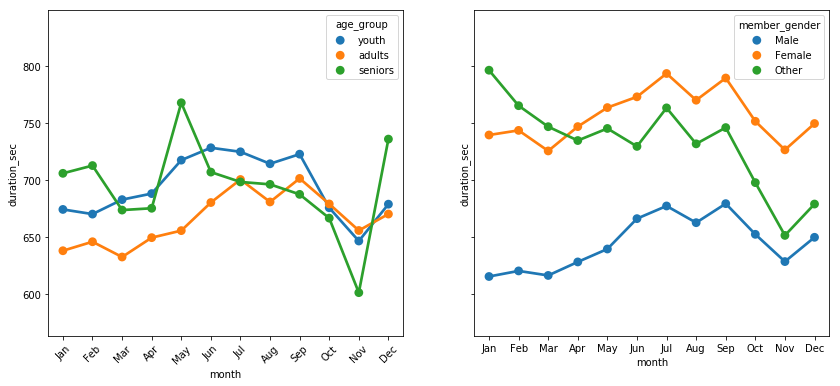

In [32]:
# Plot 2 multivariate plots side by side
figure, axis = plt.subplots(ncols = 2, sharey = True, figsize = (14, 6))

sb.pointplot(data = cat_time_data, x = 'month', y = 'duration_sec', hue = 'age_group', linestyles = '-', errwidth = 0, ax = axis[0])
plt.sca(axis[0])
plt.xticks(rotation = 45)

sb.pointplot(data = cat_time_data, x = 'month', y = 'duration_sec', hue = 'member_gender', linestyles = '-', errwidth = 0, ax = axis[1])
plt.sca(axis[0])
plt.xticks(rotation = 45)

**Observations:**

**1. There is sufficient difference in trends among the 3 age groups and Seniors especially are showing much variation along the months in terms of for what average duration they rented the bikes in each month.**

**a. It can be seen that among the three groups, seniors have rented for the highest average duration and that too in May. Youth have rented for the highest average duration among themselves in May. Finally adults have rented for the highest average duration among themselves in September.**

**b. It can also be seen that among the three groups, seniors have also rented for the lowest average duration and that too in November.**

**c. In October, all the 3 age groups rented for almost the same average duration**

**2. Here also, there is a huge difference in trends among the 3 geders and others especially are showing much variation along the months in terms of for what average duration they rented the bikes in each month.**

**a. Males are consistently showing low average duration in all the months with the highest among themseves being in September and lowest among themselves being in January and March**

**b. Females are showing mostly high average duration in all the months with the highest among themselves being in July and lowest among themselves being in November and March**

**c. Others are showing much variation. As we can see that others have rented for the highest average duration among themseves and also among all the three genders in January and for the lowest average duration among themselves in November.**

**Now, as we were interested in exploring the relationship between age groups and gender when we were seeing the bivariate plots of `duration_sec` vs `member_gender` and `duration_sec` vs `age_group`. So let's explore this further by combining `member_gender` in the boxplot of `duration_sec` vs `age_group`.**

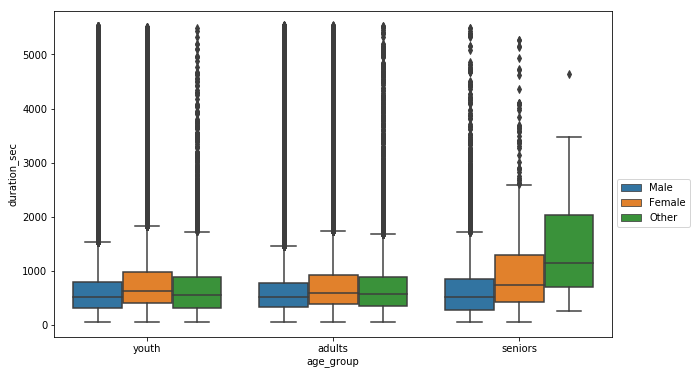

In [37]:
plt.figure(figsize = (10, 6))
sb.boxplot(data = lim_df, x = 'age_group', y = 'duration_sec', hue = 'member_gender')
plt.legend(loc = 0, bbox_to_anchor = (1, 0.5))

**Observations:**

**1. Among the youth, females are showing much variance for duration and the most common duration is also high than the males and others, while males and others are at the same level of most common duration**

**2. Adults show the same trend as youth among males, females and others.**

**3. Among the seniors, the three genders show much variation. Here males have the lowest most common duration with much variance while others have the highest most common duration with low variance.**

**Now, at the end, as we saw in the end plots in bivariate exploration of our time variables (weekday, month and hour) with variables for identifying user information(age group, user type and gender), we were interested to explore relationship between age groups and genders. So let's explore this further starting with combining `age_group` in the cat_count plot of `week_day` vs `member_gender`.**

In [38]:
# Define a countplot function for further use in FacetGrid
def cat_count(c, z, **kwargs):
    sb.countplot(x = c, hue = z, **kwargs)
    plt.xticks(rotation = 45)

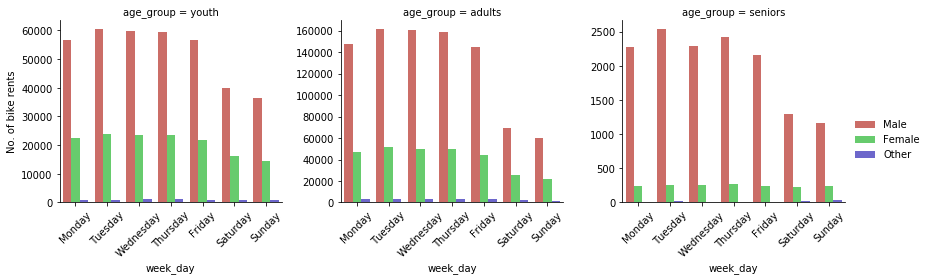

In [45]:
# Plot the 3 countplots for 3 categories of age_group
g = sb.FacetGrid(data = ford_data_cl, col = 'age_group', height = 4, sharey = False, palette = "hls")
g = g.map(cat_count, 'week_day', 'member_gender', palette = "hls")
g.add_legend()
g.set_ylabels("No. of bike rents")

**Observations:**

**1. Among the youth, males have rented the most bikes on all weekdays, followed by females and very low bikes rented by others. Males have rented the most bikes on tuesdays and least on Sundays. Same is the case for females. We can't say anything about others because of very low counts.**

**2. Adults here show the same trend as youth for all genders.**

**3. Among the seniors also, males have rented the most bikes on all weekdays, followed by females and very low bikes rented by others. Here also, males have rented the most bikes on tuesdays and least on Sundays. But for females, it is almost the same number of bikes rented on all weekdays. And here also, we can't say anything about others.**

**Now, let's explore this further with combining `age_group` in the cat_count plot of `month` vs `member_gender`.**

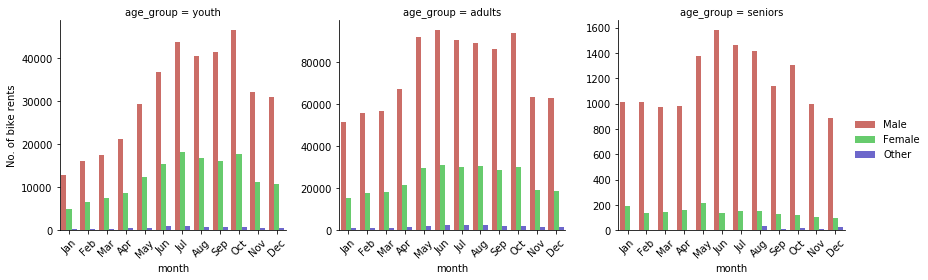

In [46]:
g = sb.FacetGrid(data = ford_data_cl, col = 'age_group', height = 4, sharey = False, palette = "hls")
g = g.map(cat_count, 'month', 'member_gender', palette = "hls")
g.add_legend()
g.set_ylabels("No. of bike rents")

**Observations:**

**1. Among the youth, males have rented the most bikes in all the months, followed by females and very low bikes rented by others. Males have rented the most bikes in October and least in January. Females have rented the most bikes in July and least in January. We can't say anything about others because of very low counts.**

**2. Among the adults also, males have rented the most bikes in all the months, followed by females and very low bikes rented by others. But here, Males have rented the most bikes in June and least in January. Here, case is the same with females. We can't say anything about others as usual because of very low counts.**

**3. Among the seniors also, males have rented the most bikes in all the months, followed by females and very low bikes rented by others. But here, Males have rented the most bikes in June and least in December. While Females have rented the most bikes in May and least in December. We can't say anything about others as usual because of very low counts.**

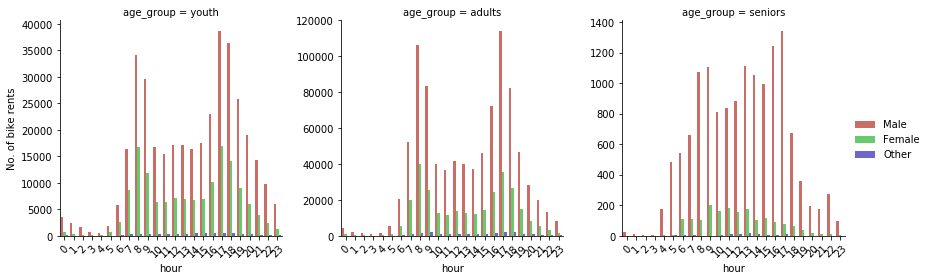

In [47]:
g = sb.FacetGrid(data = ford_data_cl, col = 'age_group', height = 4, sharey = False, palette = "hls")
g = g.map(cat_count, 'hour', 'member_gender', palette = "hls")
g.add_legend()
g.set_ylabels("No. of bike rents")

**Observations:**

**1. Among the youth, males have rented the most bikes during all the hours, followed by females and very low bikes rented by others. Males have rented the most bikes during 5 p.m.- 6p.m and 8a.m - 9a.m. and least in 3a.m. - 4a.m. Here, case is the same with females. We can't say anything about others because of very low counts.**

**2. Adults also show the same trend as youth for all the genders**

**3. Among the seniors also, males have rented the most bikes in all the months, followed by females and very low bikes rented by others. But here, Males have rented the most bikes during 4 p.m. - 5 p.m. and least during 2 a.m. - 3 a.m. While Females have rented the most bikes during 9 a.m. - 10 a.m. and least during 2 a.m. - 3 a.m. We can't say anything about others as usual because of very low counts.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Here, in the beginning, while studying the pointplots, we realized that Males and Adults show much similarity in duration for using bike when compared over the weekdays and months while the other similarities between the gender and age groups as we observed in the bivariate plots were not observed.

As we moved further with multivariate exploration, we mainly explored genders within each age group for comparison on duration and other time variables like month, weekday and hour. Here, we saw that youth and adults age groups show much similarity in terms of how many bikes were rented by eavh. Although the adults have always rented more bikes than youth but the preference in renting the number of bikes according to weekdays and hours were almost the same.

### Were there any interesting or surprising interactions between features?

There were many suprising interactio like:
1. When we were exploring the pointplots of `duration_sec` vs `month`, and we saw the surprising trends of different age groups and genders specially the seniors age group and others category in genders. To see their average duration for which they rented the bike was such a surprise.

2. In the boxplot of `duration_sec` vs `age_group` for gender comparison within each age group, it was surprising to see the distributions of duration values in seniors age group for the three genders.

<a id = 'res'></a>
## RESOURCES
1. [Matplotlib Documentation](https://matplotlib.org/)


2. [Plots using FacetGrid Object](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)


3. [Pointplots](https://seaborn.pydata.org/generated/seaborn.pointplot.html)


4. [Countplots](https://seaborn.pydata.org/generated/seaborn.countplot.html)